# Import Datasets

In [1]:
# Import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
# Import datasets from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"baguskoharaji","key":"2e7a1197c75d1f0ae9338a71160fbbc6"}'}

In [5]:
# Downloading datasets
!echo '{"username":"baguskoharaji","key":"2e7a1197c75d1f0ae9338a71160fbbc6"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d drgfreeman/rockpaperscissors

 99% 304M/306M [00:16<00:00, 24.2MB/s]
100% 306M/306M [00:16<00:00, 19.7MB/s]


In [6]:
# Data extraction on zip file
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

# Defines directory names for training data and validation data
base_dir = '/content/data'
train_dir = base_dir
validation_dir = base_dir

# Preprocessing Data

In [7]:
# Check sub directory of data
os.listdir('/content/data')

['paper', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'scissors']

In [8]:
# Delete useless txt files
os.remove('/content/data/README_rpc-cv-images.txt')

In [9]:
# Delete useless folders
import shutil
 
ignore = ['rps-cv-images']

for x in ignore:
  path = os.path.join('/content/data', x)
  shutil.rmtree(path)

In [10]:
# Re-check sub directory of data 
os.listdir('/content/data')

['paper', 'rock', 'scissors']

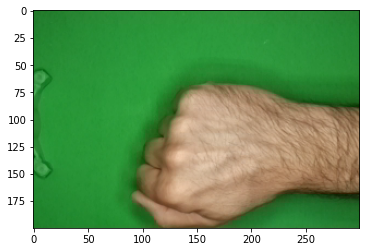

In [29]:
# See an example of an image in the dataset
from tensorflow.keras.preprocessing import image
%matplotlib inline

img = image.load_img('/content/data/rock/9ElQEC0AP2RtKdOo.png')
imgplot = plt.imshow(img)

# Applying Image Augmentation and Splitting the Image into Training and Validation Set

In [11]:
# Image augmentation of training data to duplicate existing images and by adding certain variations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4) # Split the data into 0.6 training data

# Prepare training data from directory
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=32,
        subset='training',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.4) # Split the data into 0.4 validation data

# Prepare validation data from directory
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 874 images belonging to 3 classes.


# Defining the CNN Model

In [25]:
# Building a Convolutional Neural Network (CNN) model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # The convolution layer functions to extract the attributes in the image
    tf.keras.layers.MaxPooling2D(2, 2), # Max pooling layer is useful for reducing image resolution so that the model training process is faster
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Transform into 1D array
    tf.keras.layers.Dense(512, activation='relu'), # Hidden layers
    tf.keras.layers.Dense(3, activation='softmax') # Categorical output layers
])

# See a summary of the architectural model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

# Compiling The Model with Its Optimizer, Loss Function, and Metric

In [31]:
optimizer = tf.optimizers.Adam(learning_rate=1e-4)

# Compiling model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Defining The Callbacks

In [32]:
# The callback function helps us to tell the model to stop training when it reaches a certain target
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98 ):
      print("\nAccuracy has reached the target")
      self.model.stop_training = True
callbacks = myCallback()

# Fitting Model

In [33]:
# Fitting model with training data
history = model.fit(train_generator,
#                   steps_per_epoch=10, # Batch to be executed at each epoch
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=5, 
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
42/42 - 10s - loss: 1.0350 - accuracy: 0.4756 - val_loss: 0.8572 - val_accuracy: 0.7375 - 10s/epoch - 230ms/step
Epoch 2/50
42/42 - 10s - loss: 0.6548 - accuracy: 0.7610 - val_loss: 0.4450 - val_accuracy: 0.8500 - 10s/epoch - 233ms/step
Epoch 3/50
42/42 - 10s - loss: 0.3625 - accuracy: 0.8813 - val_loss: 0.1949 - val_accuracy: 0.9375 - 10s/epoch - 239ms/step
Epoch 4/50
42/42 - 9s - loss: 0.2956 - accuracy: 0.8950 - val_loss: 0.1883 - val_accuracy: 0.9625 - 9s/epoch - 219ms/step
Epoch 5/50
42/42 - 9s - loss: 0.2372 - accuracy: 0.9209 - val_loss: 0.1251 - val_accuracy: 0.9750 - 9s/epoch - 215ms/step
Epoch 6/50
42/42 - 9s - loss: 0.1554 - accuracy: 0.9566 - val_loss: 0.0655 - val_accuracy: 0.9812 - 9s/epoch - 214ms/step
Epoch 7/50
42/42 - 10s - loss: 0.1205 - accuracy: 0.9642 - val_loss: 0.1262 - val_accuracy: 0.9500 - 10s/epoch - 232ms/step
Epoch 8/50
42/42 - 9s - loss: 0.1009 - accuracy: 0.9703 - val_loss: 0.1757 - val_accuracy: 0.9500 - 9s/epoch - 214ms/step
Epoch 9/50
42/42

# Visualizing The Model

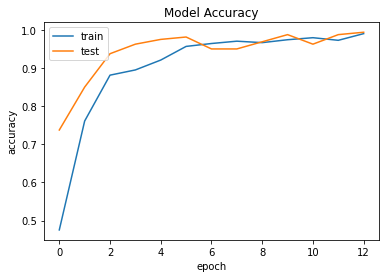

In [34]:
# Plot of accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

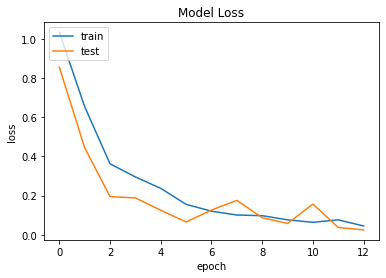

In [35]:
# Plot of loss and loss validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Testing The Model

Saving Batu.jfif to Batu.jfif
1/1 [==============================] - 0s 15ms/step
Batu.jfif
This is Rock


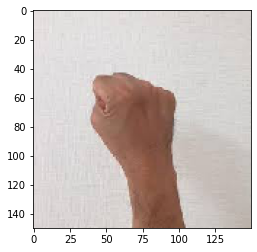

In [38]:
# Test the model to predict new images (images that are not known by the previous model)
from google.colab import files
from keras.preprocessing import image

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images 
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model.predict(images, batch_size=10)
  
  print(fn)
  if pred[0][0]!=1:
    print('This is Paper')
  elif pred[0][1]!=1:
    print('This is Rock')
  elif pred[0][2]!=1:
    print('This is Scissor')